# Business Understanding

## Project Domain

Domain: Kesehatan dan Gaya Hidup

Sub-domain: Prediksi Gangguan Tidur Berdasarkan Gaya Hidup

Sistem prediksi gangguan tidur termasuk dalam bidang analisis kesehatan yang memanfaatkan data science dan machine learning untuk membantu individu dan tenaga medis memahami pola-pola gaya hidup yang dapat memengaruhi kualitas tidur serta mendeteksi potensi gangguan tidur seperti Insomnia dan Sleep Apnea.

## Problem Statements

Deteksi Dini Gangguan Tidur Masih Lemah
1. Banyak orang mengalami gangguan tidur tanpa menyadarinya secara medis, sehingga gejala terus berkembang tanpa intervensi yang tepat.

2. Kurangnya Intervensi Personal Berdasarkan Data Gaya Hidup
Intervensi atau edukasi tidur umumnya bersifat umum, tidak berbasis data individu seperti tingkat stres, aktivitas, tekanan darah, dan gaya hidup.

3. Data Kesehatan dan Gaya Hidup Belum Dimanfaatkan Optimal
Informasi penting seperti BMI, tekanan darah, jam tidur, dan tingkat stres sering dikumpulkan tapi tidak diolah menjadi insight untuk pencegahan atau diagnosis awal.

4. Risiko Gangguan Tidur Menurun Jika Dideteksi Dini
Intervensi gaya hidup yang tepat dan personal dapat membantu menurunkan risiko insomnia dan sleep apnea secara signifikan.

## Goals

Membangun sistem prediksi gangguan tidur berbasis AI (Machine Learning) untuk memprediksi kondisi tidur seseorang berdasarkan parameter:

- Faktor gaya hidup (aktivitas fisik, tingkat stres, penggunaan teknologi)

- Faktor kesehatan (tekanan darah, indeks massa tubuh/BMI, riwayat medis)

- Faktor pribadi (jenis kelamin, usia, durasi tidur, kualitas tidur)

## Solution Statements

1. Model Machine Learning

Menggunakan model klasifikasi (neural network) untuk memprediksi gangguan tidur (None, Insomnia, Sleep Apnea) berdasarkan fitur gaya hidup dan kesehatan individu.

2. Analisis Faktor Penting

Mengidentifikasi fitur-fitur paling berpengaruh terhadap risiko gangguan tidur dengan metode interpretasi model seperti analisis bobot pada layer pertama atau SHAP value.

3. Integrasi ke Aplikasi Mobile

Model yang telah dilatih akan digunakan sebagai bagian dari fitur aplikasi Android untuk membantu pengguna memantau potensi gangguan tidur berdasarkan input pribadi.

# Data Understanding

## Import data dari kaggle

In [79]:
import kagglehub

datasource_path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset", path="Sleep_health_and_lifestyle_dataset.csv")
print('Data source import complete.')
print(datasource_path)

Data source import complete.
C:\Users\Acama\.cache\kagglehub\datasets\uom190346a\sleep-health-and-lifestyle-dataset\versions\2\Sleep_health_and_lifestyle_dataset.csv


## Import Library

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

## Exploratory Data Analysis

In [81]:
df = pd.read_csv(datasource_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [83]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


#### Drop unrelated column

In [84]:
df = df.drop(columns=['Person ID'])

In [85]:
df['Daily Steps'].unique()

array([ 4200, 10000,  3000,  3500,  8000,  4000,  4100,  6800,  5000,
        7000,  5500,  5200,  5600,  3300,  4800,  7500,  7300,  6200,
        6000,  3700])

#### Missing value and unique counts analysis

In [86]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [87]:
df["Stress Level"].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [88]:
for column in df.columns:
  print(f"Unique counts for column: {column}")
  print(df[column].unique())
  print()  

Unique counts for column: Gender
['Male' 'Female']

Unique counts for column: Age
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]

Unique counts for column: Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique counts for column: Sleep Duration
[6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]

Unique counts for column: Quality of Sleep
[6 4 7 5 8 9]

Unique counts for column: Physical Activity Level
[42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]

Unique counts for column: Stress Level
[6 8 7 4 3 5]

Unique counts for column: BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique counts for column: Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'


<Axes: >

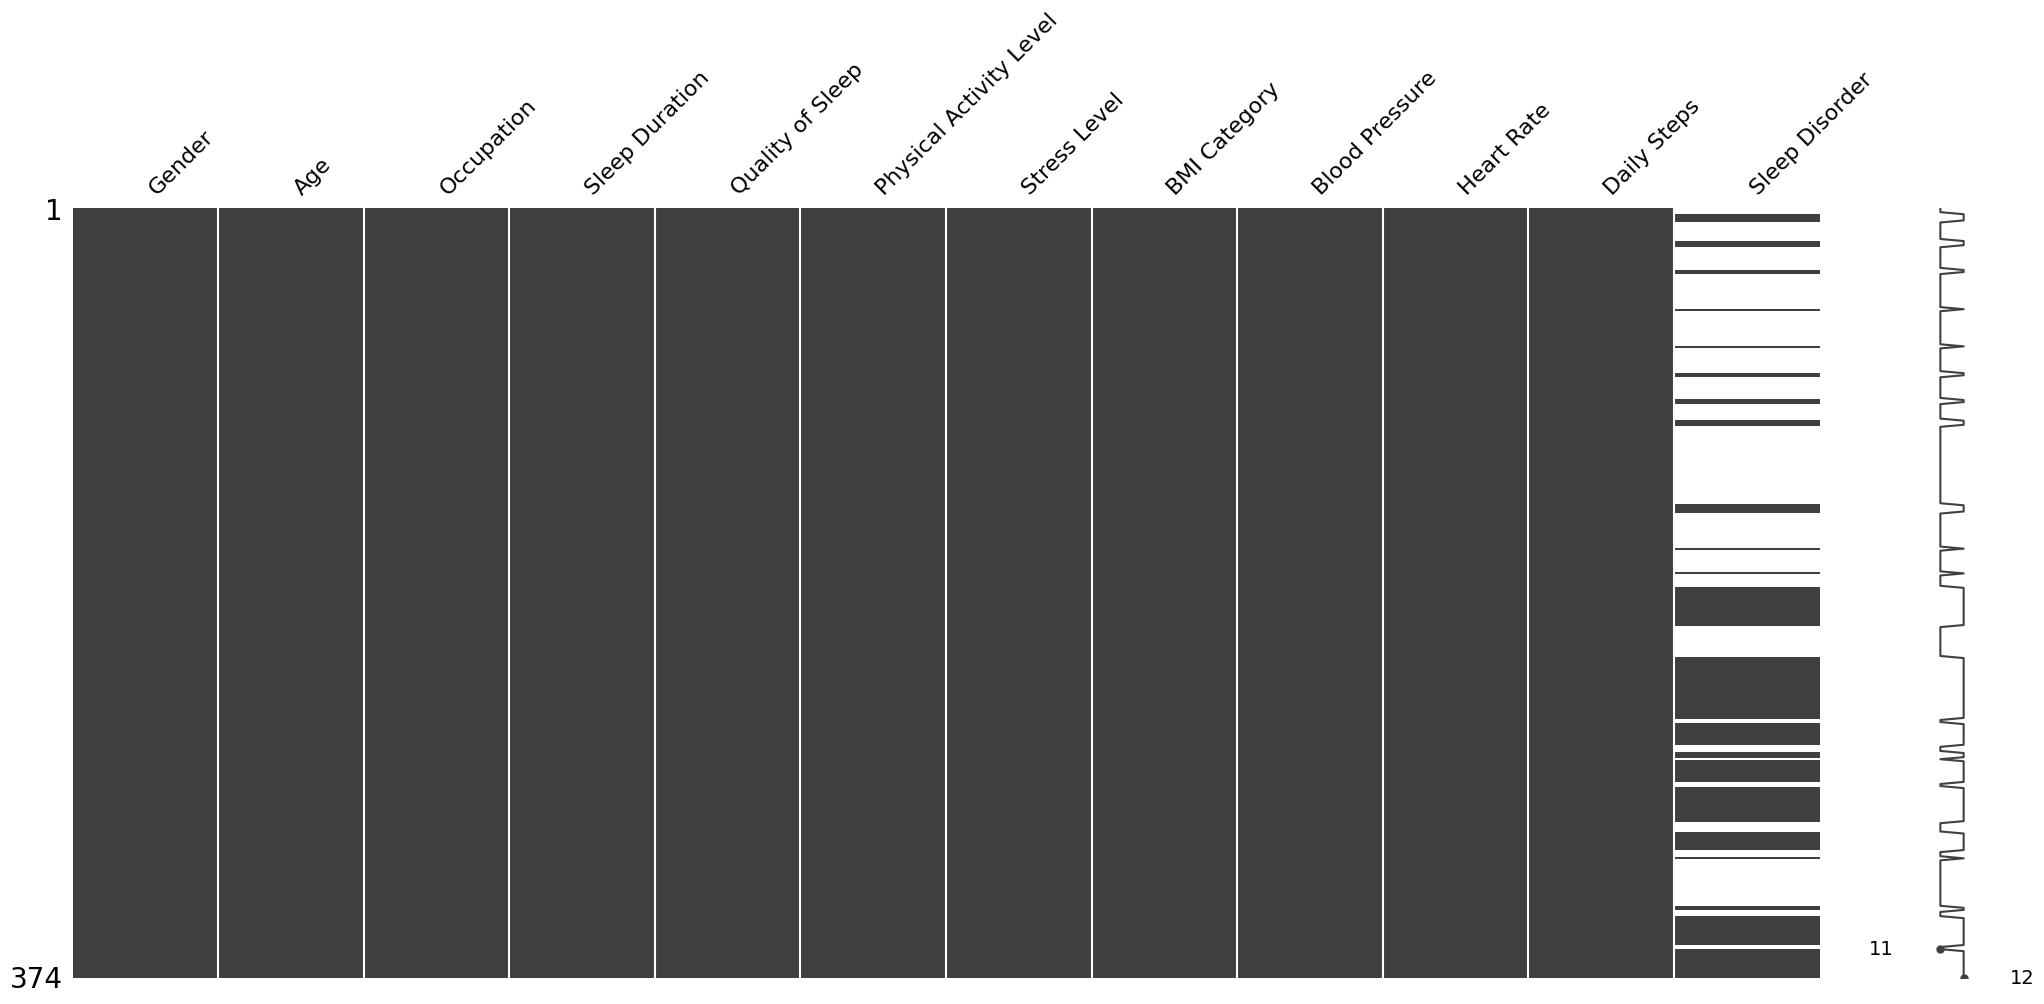

In [89]:
msno.matrix(df)

In [90]:
df.fillna({"Sleep Disorder": "Nothing"}, inplace=True)

In [91]:
df[["Sleep Disorder"]].value_counts()

Sleep Disorder
Nothing           219
Sleep Apnea        78
Insomnia           77
Name: count, dtype: int64

In [92]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

#### Analysis and Visualization

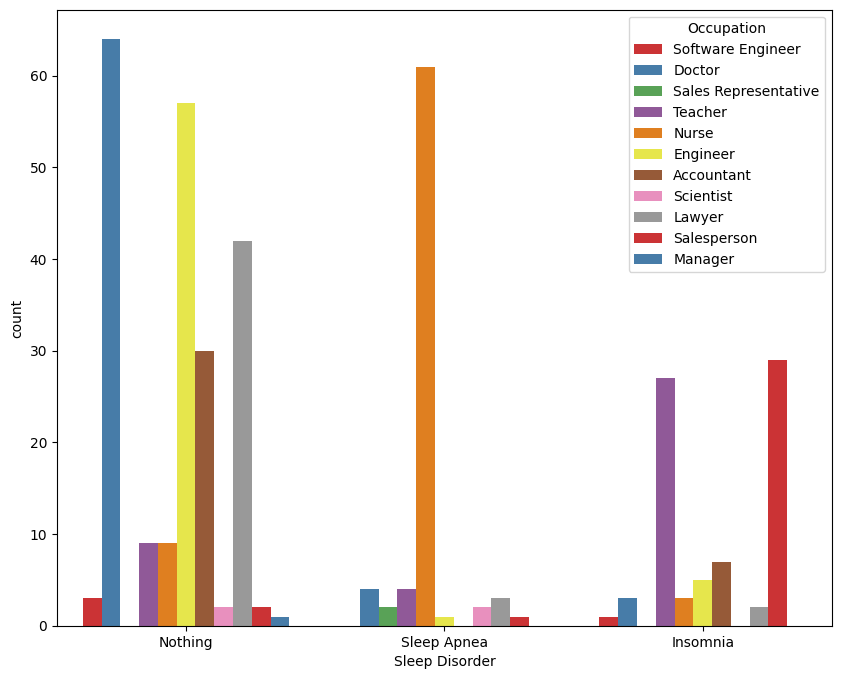

In [93]:
plt.figure(figsize=(10,8))
sns.countplot(hue="Occupation",x="Sleep Disorder",data=df,palette="Set1")
plt.show()    

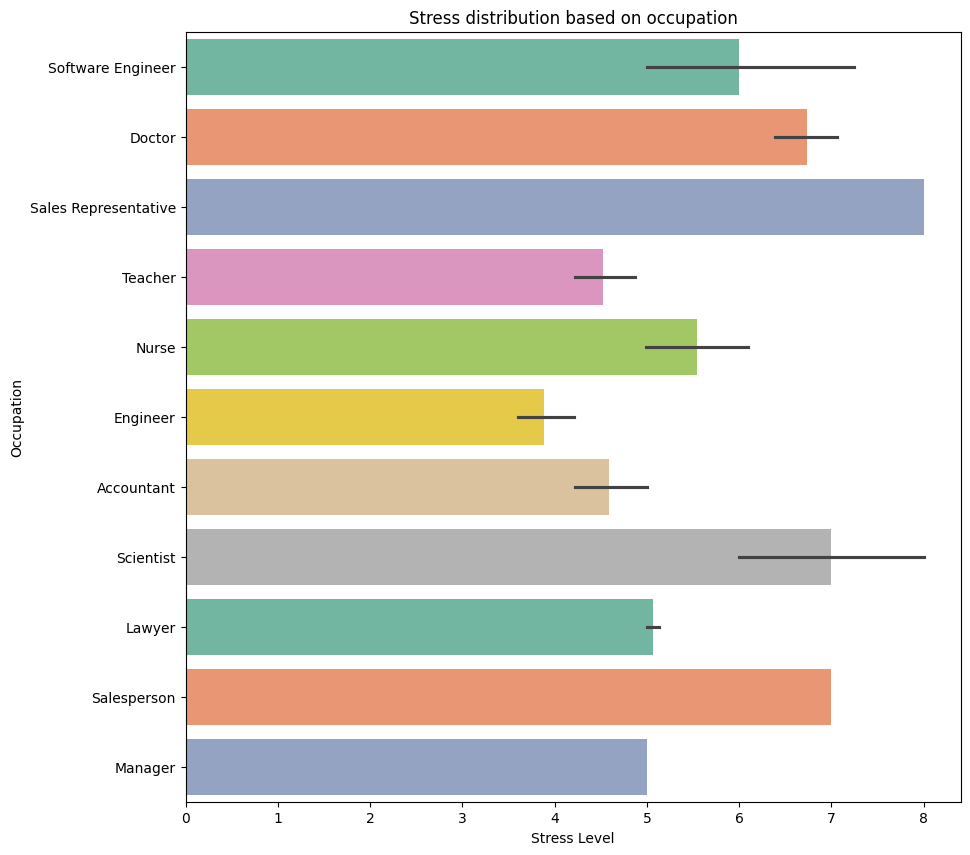

In [94]:
plt.figure(figsize=(10,10))
plt.title("Stress distribution based on occupation")
sns.barplot(y="Occupation", x="Stress Level", data=df, hue="Occupation", palette="Set2", legend=False)
plt.show()

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


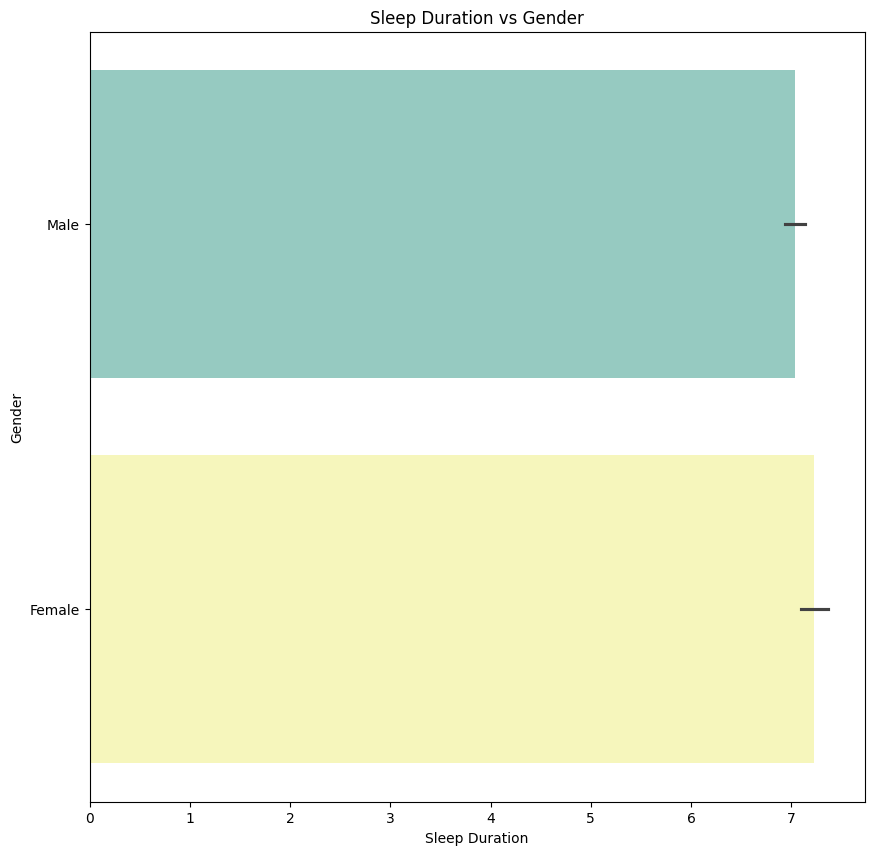

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


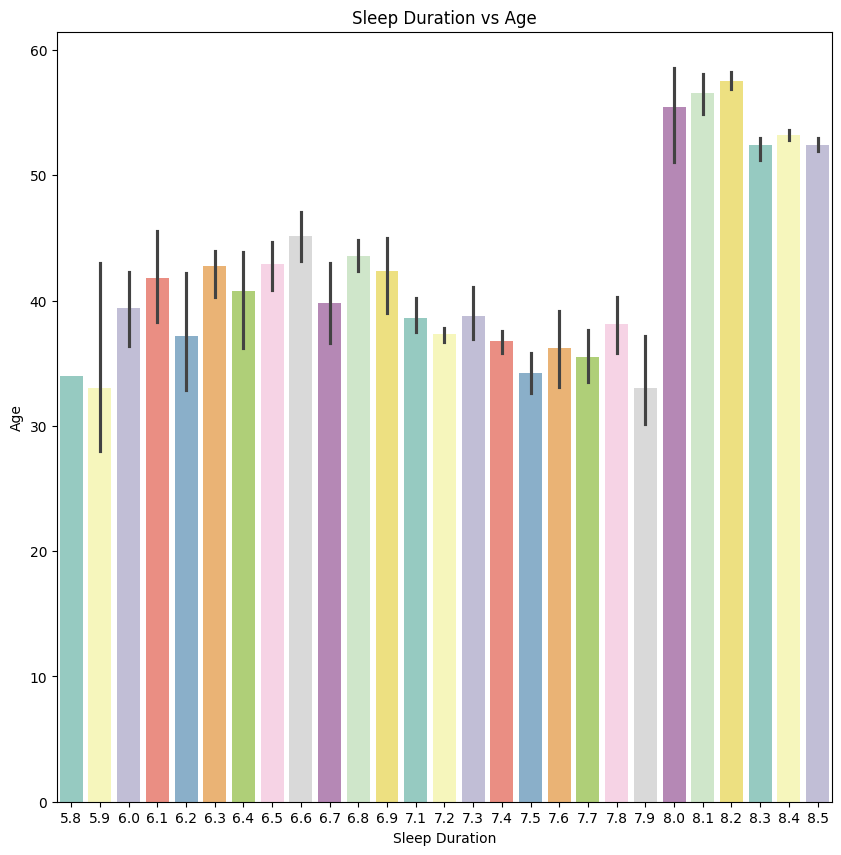

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


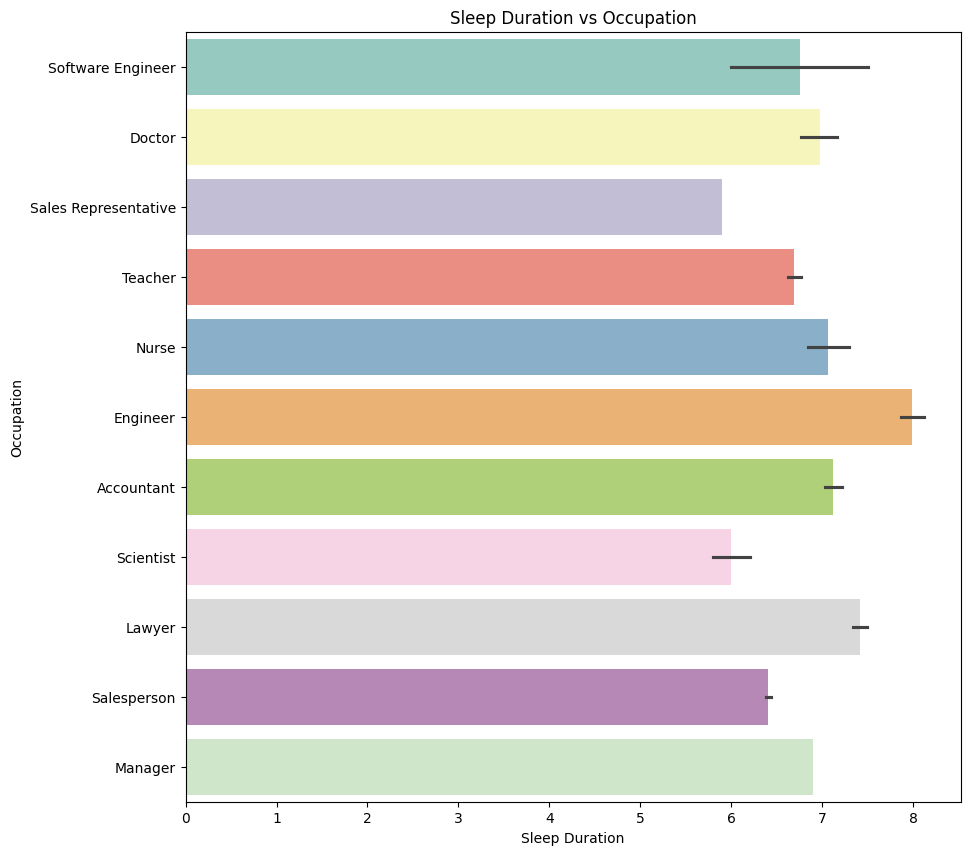

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


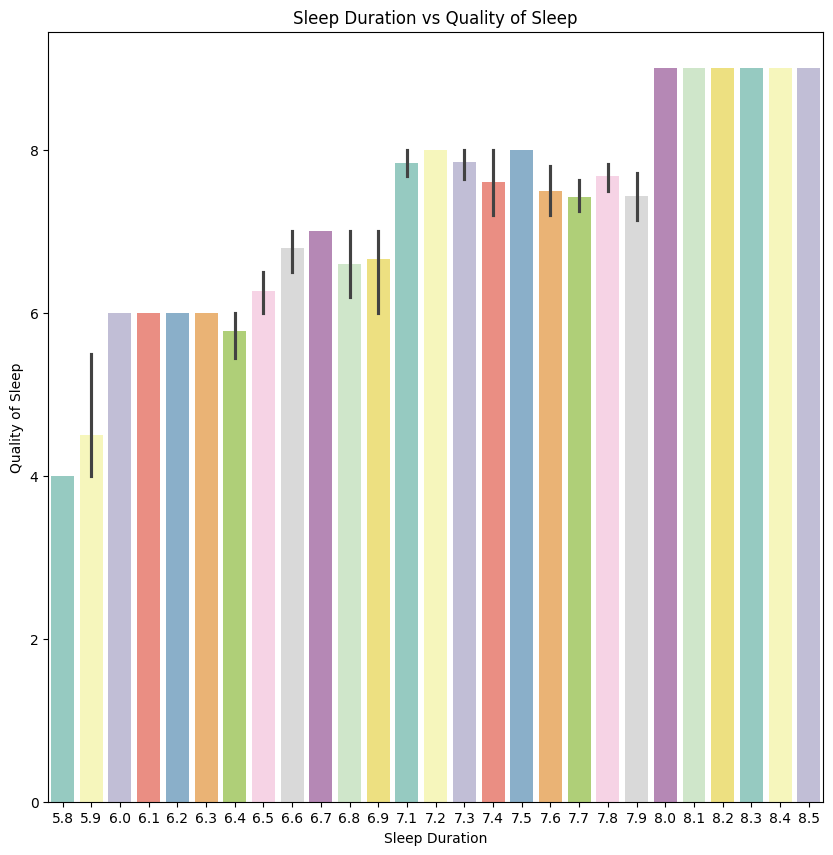

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


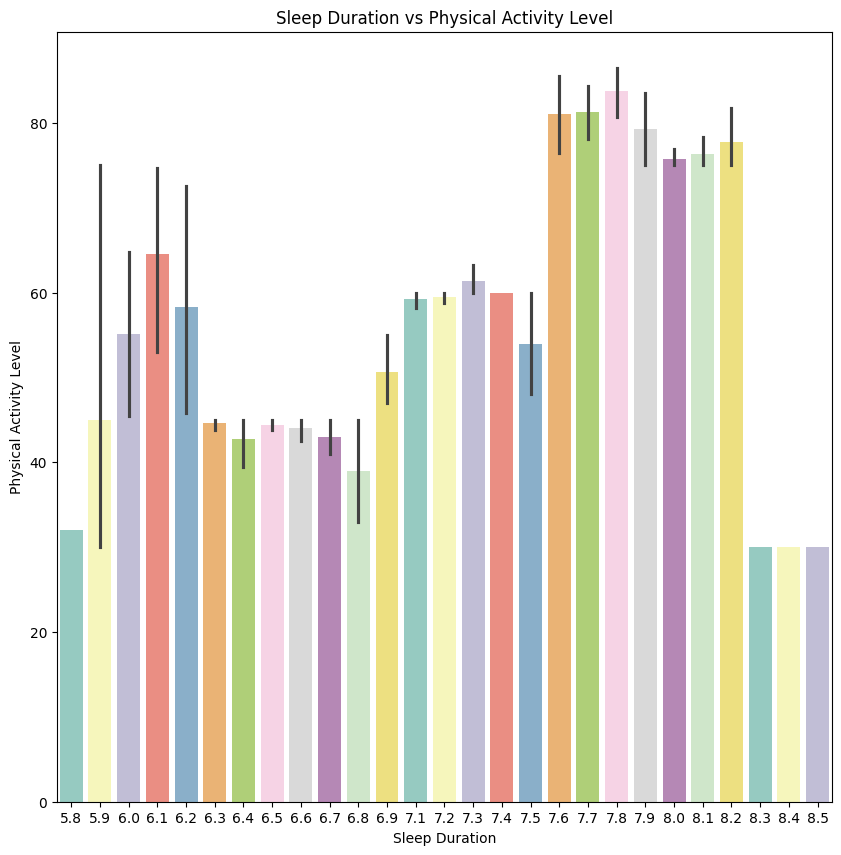

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


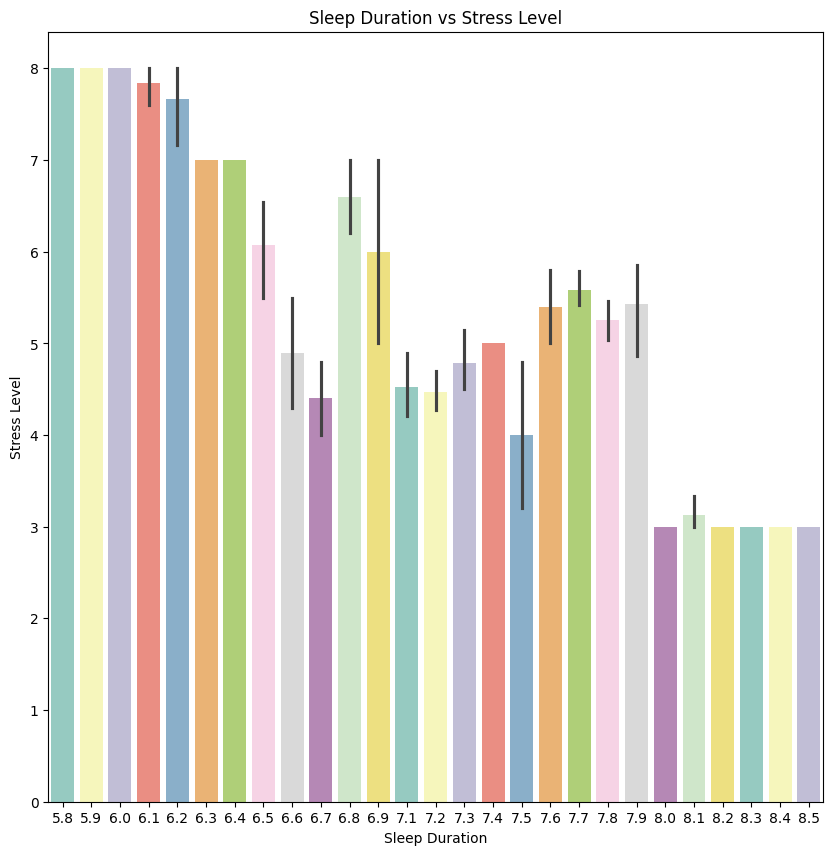

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


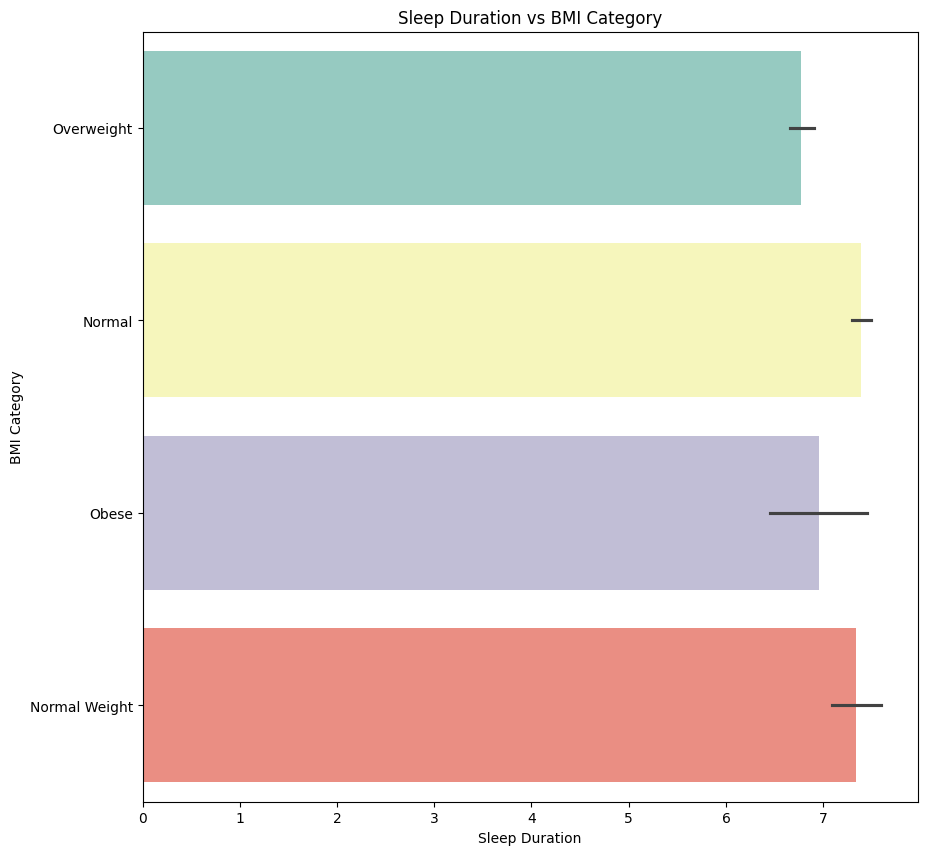

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


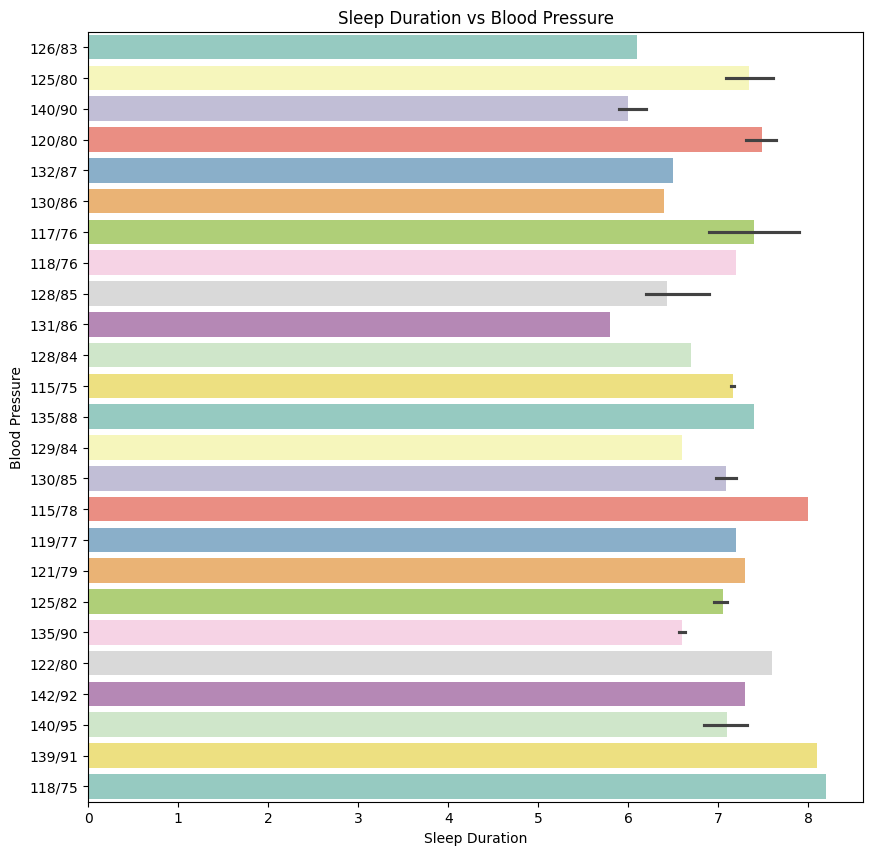

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


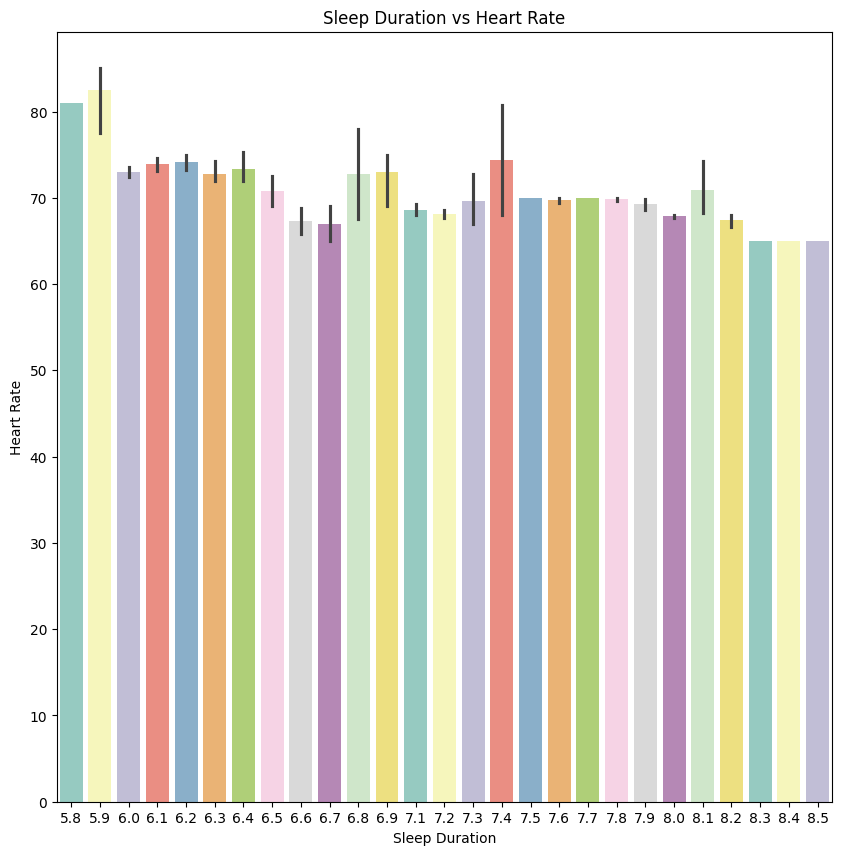

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


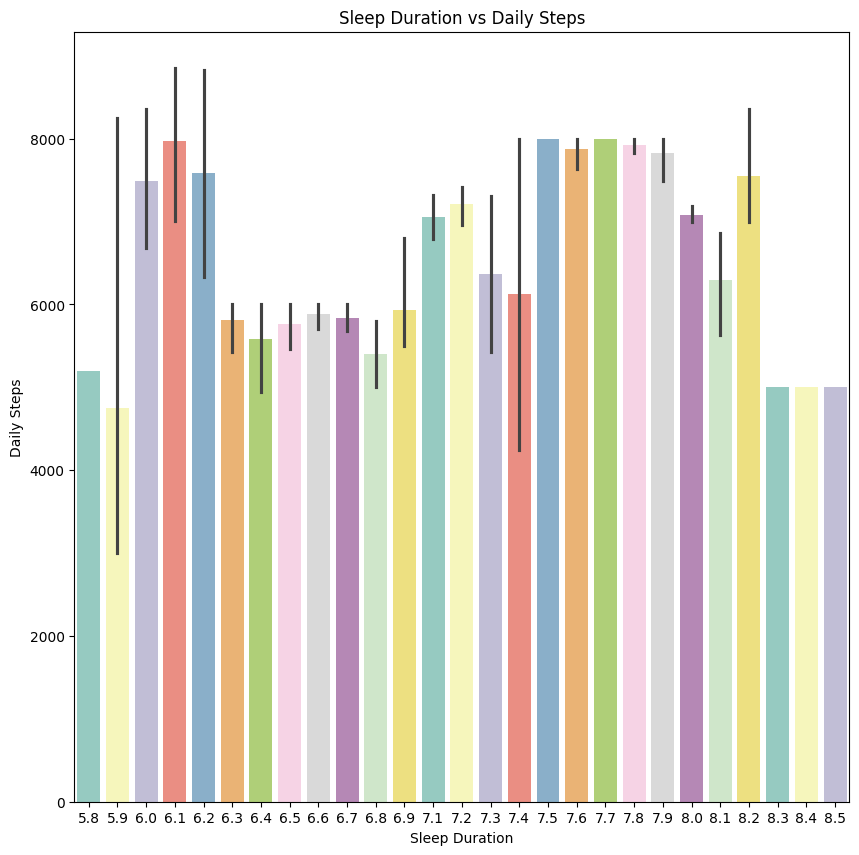

C:\Users\Acama\AppData\Local\Temp\ipykernel_12352\2042769585.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")


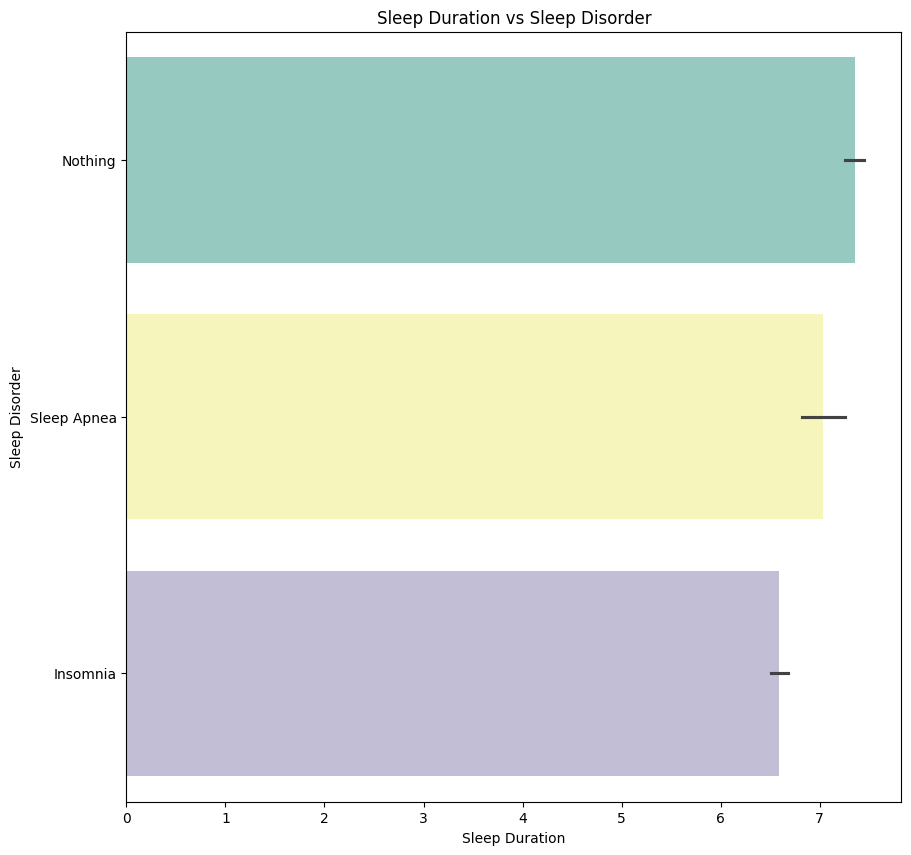

In [95]:
for column in df.columns:
  if column != "Sleep Duration":  
      plt.figure(figsize=(10, 10))  
      sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")
      plt.title(f"Sleep Duration vs {column}")  
      plt.show() 

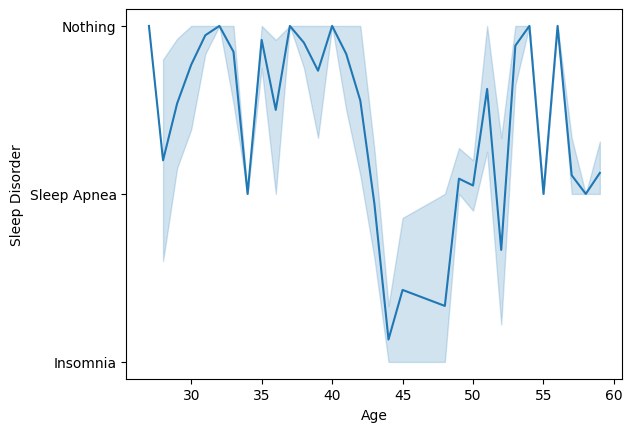

In [96]:
sns.lineplot(y="Sleep Disorder",x="Age",data=df);

#### Outlier Analysis

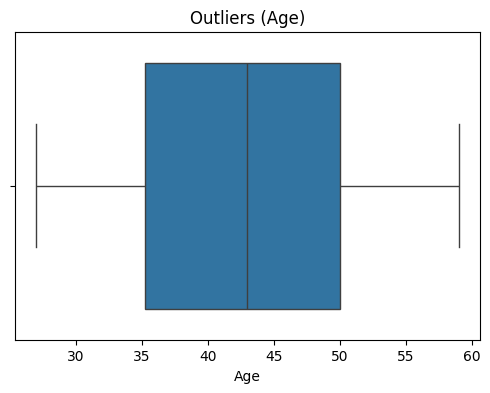

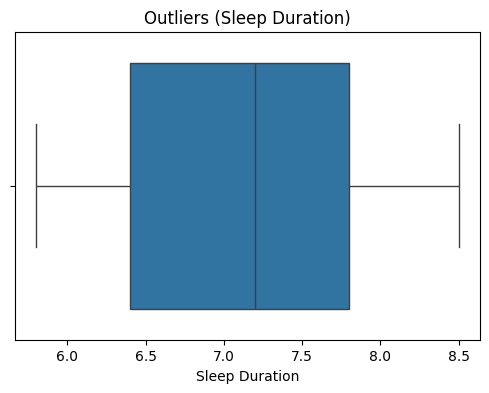

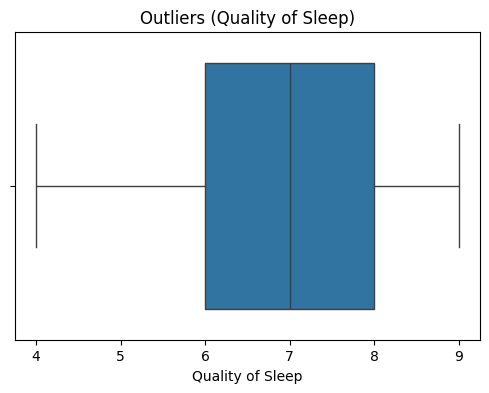

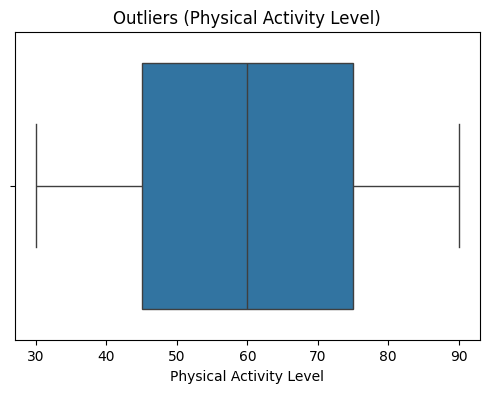

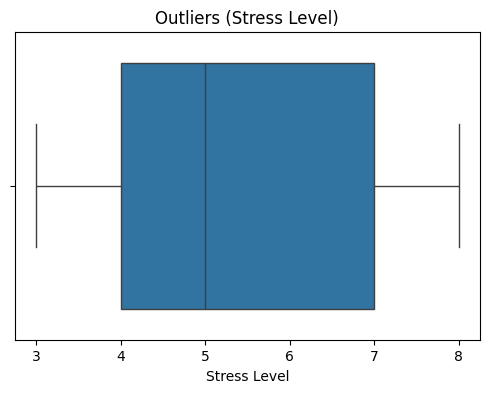

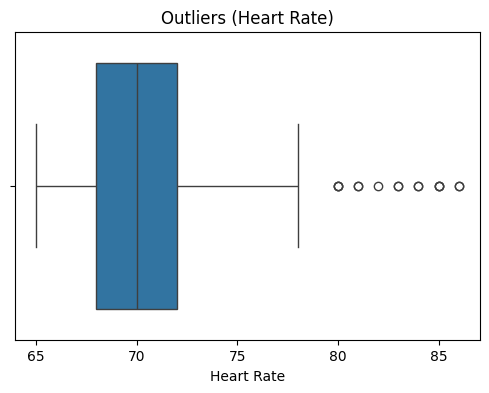

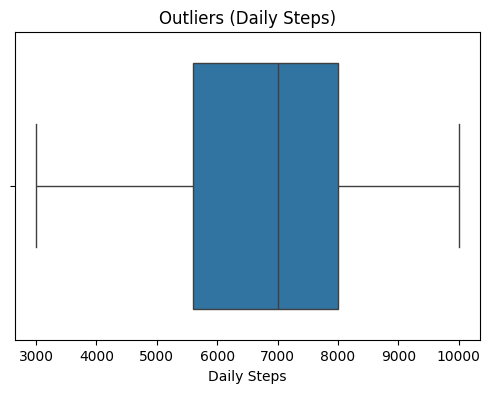

Outliers in the Age column: []
Outliers in the Sleep Duration column: []
Outliers in the Quality of Sleep column: []
Outliers in the Physical Activity Level column: []
Outliers in the Stress Level column: []
Outliers in the Heart Rate column: [85 85 85 82 80 80 81 81 84 84 80 83 83 86 86]
Outliers in the Daily Steps column: []


In [97]:
def detect_outliers(df, method="IQR", threshold=1.5):
  outlier_dict = {} 
  
  for col in df.select_dtypes(include=[np.number]):  
      if method == "IQR":
          Q1 = df[col].quantile(0.25)
          Q3 = df[col].quantile(0.75)
          IQR = Q3 - Q1
          lower_bound = Q1 - threshold * IQR
          upper_bound = Q3 + threshold * IQR
          outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      
      elif method == "z-score":
          mean = df[col].mean()
          std = df[col].std()
          z_scores = (df[col] - mean) / std
          outliers = df[np.abs(z_scores) > threshold]

      else:
          raise ValueError("Invalid method! You should use 'IQR' or 'z-score'.")

      outlier_dict[col] = outliers[col].values

      # Visualize outliers
      plt.figure(figsize=(6, 4))
      sns.boxplot(x=df[col])
      plt.title(f"Outliers ({col})")
      plt.show()

  return outlier_dict

outliers = detect_outliers(df, method="IQR", threshold=1.5)

for key, values in outliers.items():
    print(f"Outliers in the {key} column: {values}")

In [98]:
# Hapus data outlier
df = df[~df["Heart Rate"].isin([85, 82, 80, 81, 84, 83, 86])]

In [99]:
df["Heart Rate"].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
77     2
69     2
76     2
74     2
67     2
73     2
Name: count, dtype: int64

In [100]:
df[["Systolic Pressure", "Diastolic Pressure"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df.drop(columns=["Blood Pressure"], inplace=True)

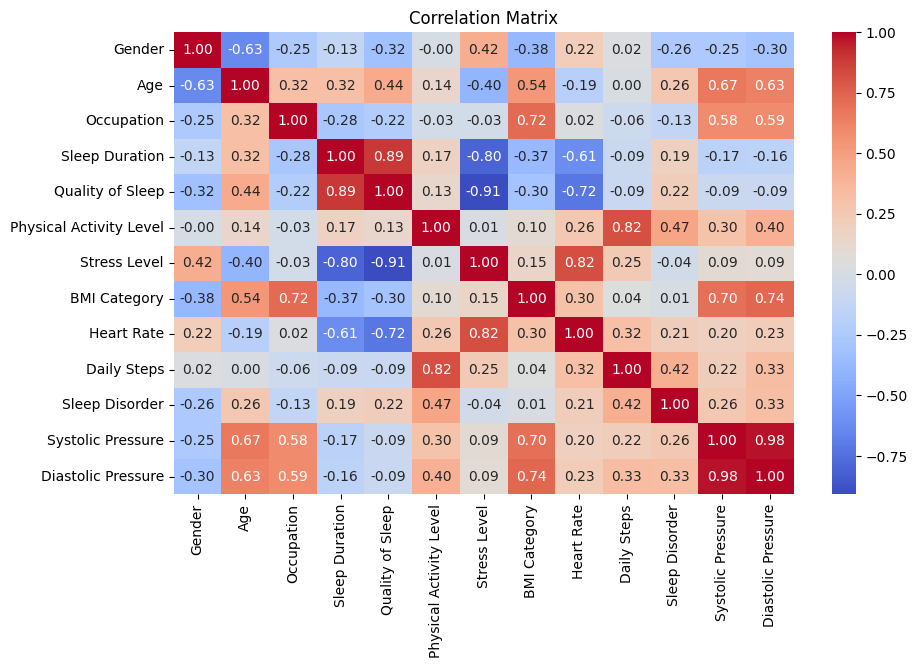

In [101]:
df_encoded = df.copy()


for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])


correlation = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Data Preparation

In [102]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [103]:
X = pd.get_dummies(X,drop_first=True)

In [104]:
X.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Male,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,126,83,True,...,False,False,False,False,False,False,True,False,False,True
1,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,False
7,29,7.8,7,75,6,70,8000,120,80,True,...,False,False,False,False,False,False,False,False,False,False
8,29,7.8,7,75,6,70,8000,120,80,True,...,False,False,False,False,False,False,False,False,False,False


In [105]:
le = LabelEncoder()
y = le.fit_transform(y)

In [106]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [107]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [108]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(8, activation='relu'),
  Dense(3, activation='softmax') 
])

q:\repositories\sleep-ann\Env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


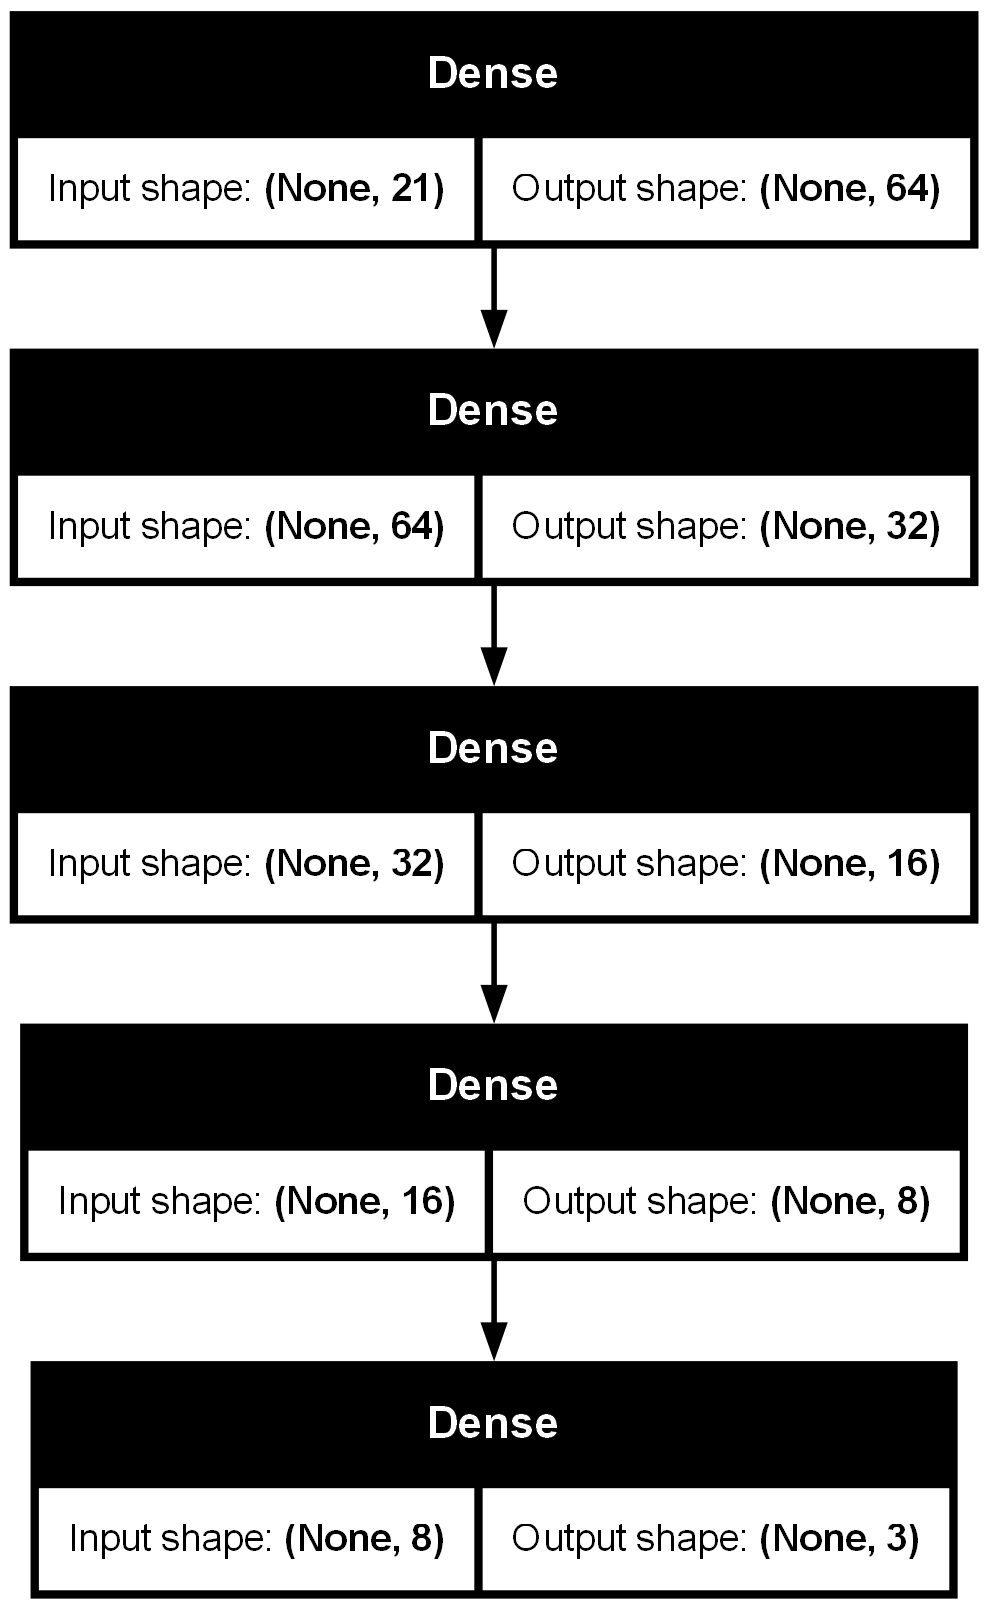

In [109]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4998 - loss: 1.0736 - val_accuracy: 0.8103 - val_loss: 0.8157
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7404 - loss: 0.8438 - val_accuracy: 0.8103 - val_loss: 0.6723
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7178 - loss: 0.7493 - val_accuracy: 0.8103 - val_loss: 0.5714
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7797 - loss: 0.6371 - val_accuracy: 0.9483 - val_loss: 0.5036
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8857 - loss: 0.5462 - val_accuracy: 0.9483 - val_loss: 0.4661
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8857 - loss: 0.5291 - val_accuracy: 0.9483 - val_loss: 0.4377
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9135 - loss: 0.4931 - val_accuracy: 0.9483 - val_loss: 0.4073
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9152 - loss: 0.4460 - val_accuracy: 0.9828 - val_loss: 0.3770
Epoch 9

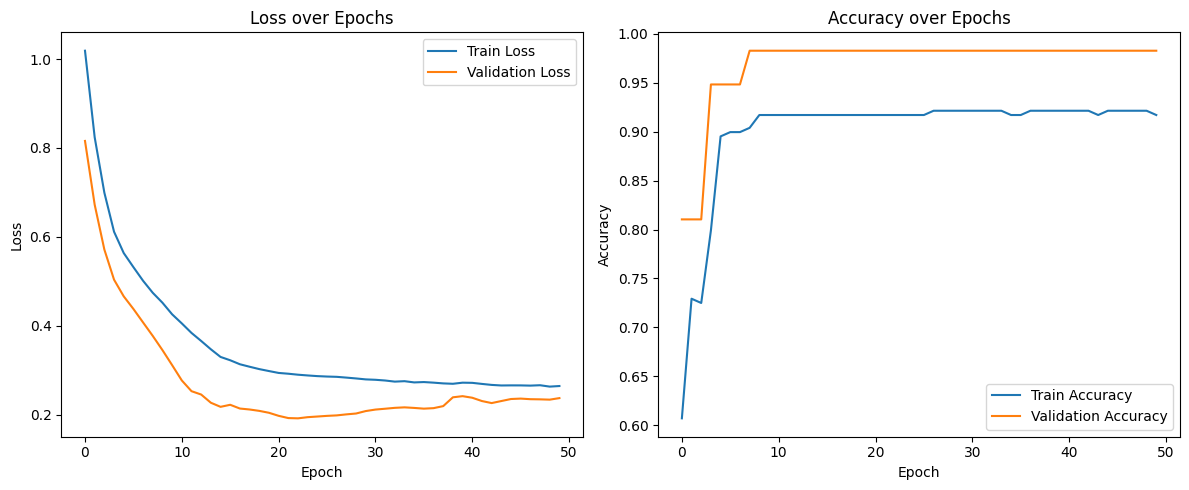

In [111]:
# Plot training history: Loss and Accuracy over epochs
history = model.history.history if hasattr(model, 'history') else None

if history is None:
  print("Training history is not available. Please ensure you have stored the model.fit() result.")
else:
  # Loss over epochs
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history['loss'], label='Train Loss')
  plt.plot(history['val_loss'], label='Validation Loss')
  plt.title('Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # Accuracy over epochs
  plt.subplot(1, 2, 2)
  plt.plot(history['accuracy'], label='Train Accuracy')
  plt.plot(history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

### Evaluation

In [112]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8837 - loss: 0.5191 
Test Accuracy: 0.86


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000265415684A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


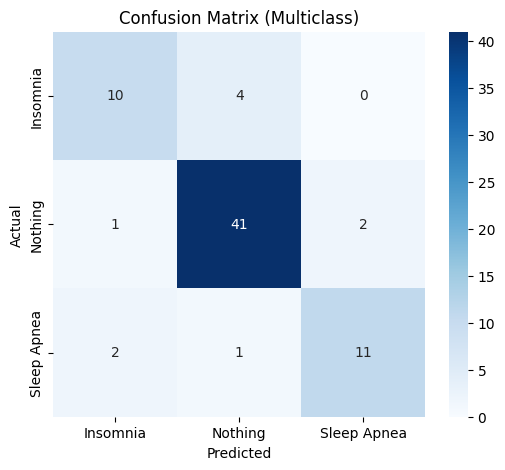

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multiclass)")
plt.show()

# Deployment

## Model Simulation

In [120]:

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

comparison_df = pd.DataFrame({
  "Actual": le.inverse_transform(y_test[:10]),
  "Predicted": le.inverse_transform(y_pred[:10])
})
print(comparison_df)

print("\nPrediction probabilities for first 5 samples:")
print(y_pred_probs[:5])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
        Actual    Predicted
0     Insomnia     Insomnia
1      Nothing      Nothing
2      Nothing      Nothing
3  Sleep Apnea  Sleep Apnea
4     Insomnia     Insomnia
5  Sleep Apnea     Insomnia
6  Sleep Apnea      Nothing
7      Nothing      Nothing
8  Sleep Apnea  Sleep Apnea
9      Nothing      Nothing

Prediction probabilities for first 5 samples:
[[8.8271737e-01 8.3478019e-02 3.3804677e-02]
 [4.3214425e-03 9.9060047e-01 5.0780284e-03]
 [5.0921288e-05 9.9991381e-01 3.5209465e-05]
 [2.4026465e-02 2.5352633e-02 9.5062095e-01]
 [8.6143702e-01 1.2217643e-01 1.6386541e-02]]


## Save Model

In [114]:
model.save("./sleep_health.h5")

In [115]:
from keras.models import load_model

loaded_model = load_model("./sleep_health.h5")
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,181 (16.34 KB)

 Trainable params: 4,179 (16.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [116]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
open("./sleep_health.tflite", "wb").write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Acama\AppData\Local\Temp\tmpsh20cxgk\assets


INFO:tensorflow:Assets written to: C:\Users\Acama\AppData\Local\Temp\tmpsh20cxgk\assets


Saved artifact at 'C:\Users\Acama\AppData\Local\Temp\tmpsh20cxgk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2633988672784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870245712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870244944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870244752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870241680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870244176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870245328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870243216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870243792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2633870243600: TensorSpec(shape=(), dtype=tf.resource, name=None)


10648

In [117]:
import os
print("Lokasi penyimpanan saat ini:", os.getcwd())

Lokasi penyimpanan saat ini: q:\repositories\sleep-ann
